Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejores parámetros:  {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Accuracy:  0.58125
ROC AUC:  0.6466822638146168
Confusion Matrix:
 [[ 0  1  0  1  0  0]
 [ 0  4  4  3  0  0]
 [ 3  9 86 32  6  0]
 [ 2 12 23 72 13  6]
 [ 0  0  1  9 23  7]
 [ 0  0  0  1  1  1]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.15      0.36      0.22        11
           5       0.75      0.63      0.69       136
           6       0.61      0.56      0.59       128
           7       0.53      0.57      0.55        40
           8       0.07      0.33      0.12         3

    accuracy                           0.58       320
   macro avg       0.35      0.41      0.36       320
weighted avg       0.64      0.58      0.60       320



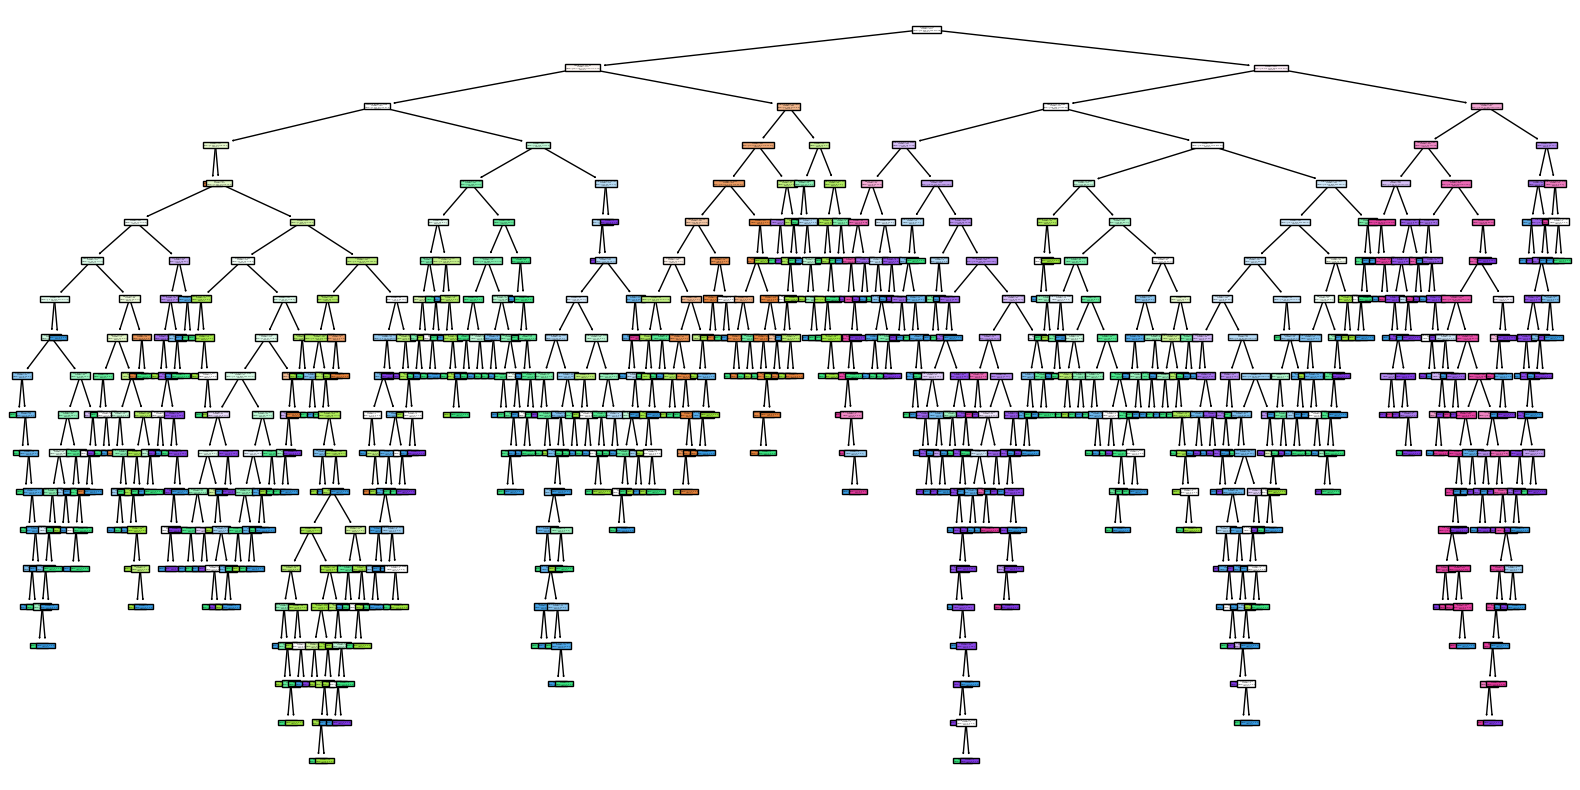

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import matplotlib.pyplot as plt

# Cargar datos
data = pd.read_csv('C:\\python\\ArbolDecision\\winequality-red.csv')

# Preparar datos
X = data.drop('quality', axis=1)
y = data['quality']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Pipeline con SMOTE y Decision Tree
pipeline = ImbPipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Parámetros para GridSearchCV
param_grid = {
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__min_samples_split': [2, 5, 10]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=StratifiedKFold(5), scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Mejores parámetros y modelo
print("Mejores parámetros: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Predicciones y evaluación
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_prob, multi_class='ovo'))  # Para multiclase
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualización del árbol de decisiones
plt.figure(figsize=(20,10))
plot_tree(best_model.named_steps['classifier'], filled=True, feature_names=X.columns.tolist(), class_names=[str(x) for x in sorted(y.unique())], impurity=False)
plt.show()
